📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/04wk-1.html](https://guebin.github.io/DL2025/posts/04wk-1.html)

# 2. Imports 📝

In [1]:
import torch
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 꺽인직선을 만드는 방법 📝

*지난시간복습*

In [3]:
# 오늘의 잔소리.. 
## 회귀(카페예제): yhat=직선=linr(x), 정규분포, MSEloss
## 로지스틱(스펙과취업): yhat=곡선=sig(직선)=sig(linr(x)), 베르누이, BCELoss
## 이름없음(스펙의역설): yhat=꺽인곡선=sig(꺽인직선)=sig(??), 베르누이, BCELOss

`-` 로지스틱의 한계를 극복하기 위해서는 시그모이드를 취하기 전에 꺽인 그래프 모양을 만드는 기술이 있어야겠음. 

`-` 아래와 같은 벡터 ${\bf x}$를 가정하자. 

In [4]:
x = torch.linspace(-1,1,1001).reshape(-1,1)
x

tensor([[-1.0000],
        [-0.9980],
        [-0.9960],
        ...,
        [ 0.9960],
        [ 0.9980],
        [ 1.0000]])

`-` 목표: 아래와 같은 벡터 ${\bf y}$를 만들어보자.

$${\bf y} = [y_1,y_2,\dots,y_{n}]^\top, \quad y_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$$

:::{.callout-caution}
일반적으로 제 강의노트에서 

- 독립변수 = 설명변수 = ${\bf x}$, ${\bf X}$
- 종속변수 = 반응변수 = ${\bf y}$

를 의미하는데요, 여기에서 $({\bf x},{\bf y})$ 는 (독립변수,종속변수) 혹은 (설명변수,반응변수) 를 의미하는게 아닙니다. 
:::

`# 방법1` -- 수식 그대로 구현 

🗣️(

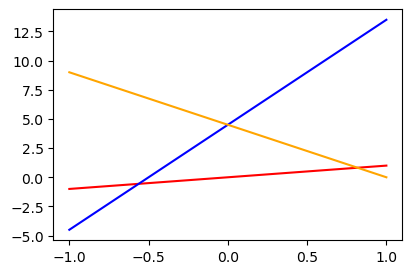

In [7]:
plt.plot(x,x,color="red")
plt.plot(x,9*x+4.5,color="blue")
plt.plot(x,-4.5*x+4.5,color="orange")

In [9]:
# (9*x+4.5)[x<0]

In [10]:
len(9*x+4.5)

1001

In [11]:
len((9*x+4.5)[x<0])

501

)🗣️

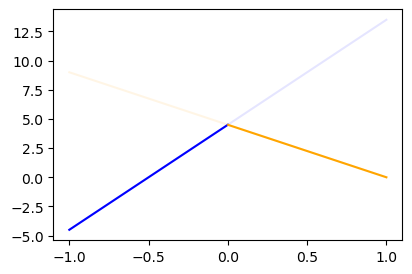

In [12]:
plt.plot(x,9*x+4.5,color="blue",alpha=0.1)
plt.plot(x[x<0], (9*x+4.5)[x<0],color="blue")
plt.plot(x,-4.5*x+4.5,color="orange",alpha=0.1)
plt.plot(x[x>0], (-4.5*x+4.5)[x>0],color="orange")

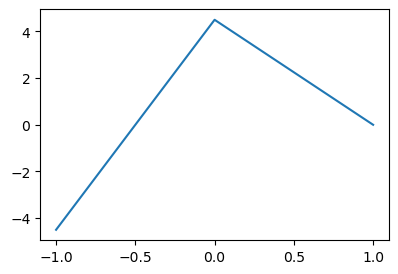

In [13]:
y = x*0
y[x<0] = (9*x+4.5)[x<0]
y[x>0] = (-4.5*x+4.5)[x>0]
plt.plot(x,y)

`#`

`# 방법2` -- 렐루이용 

🗣️(

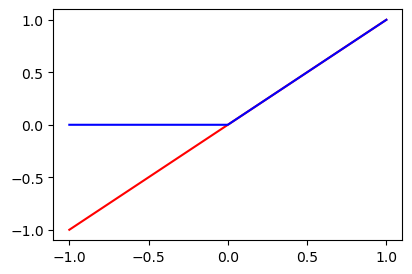

In [14]:
relu = torch.nn.ReLU()
plt.plot(x,x,color="red")
plt.plot(x,relu(x),color="blue")

- x가 0보다 작으면 y를 0으로 만듦

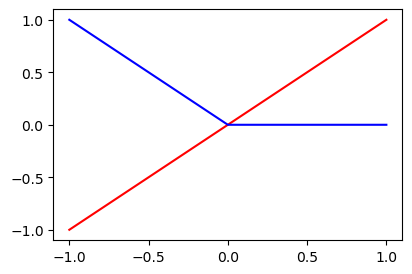

In [15]:
relu = torch.nn.ReLU()
plt.plot(x,x,color="red")
plt.plot(x,relu(-x),color="blue")

- y축 대칭

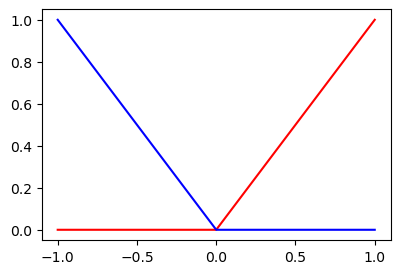

In [16]:
relu = torch.nn.ReLU()
plt.plot(x,relu(x),color="red")
plt.plot(x,relu(-x),color="blue")

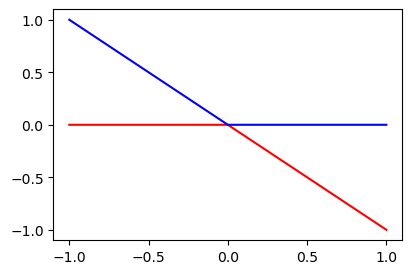

In [17]:
relu = torch.nn.ReLU()
plt.plot(x,-relu(x),color="red")
plt.plot(x,relu(-x),color="blue")

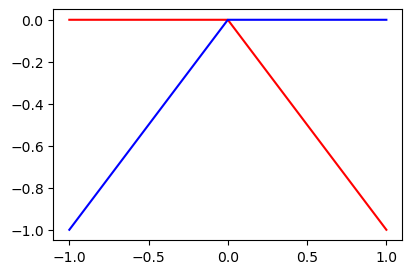

In [18]:
relu = torch.nn.ReLU()
plt.plot(x,-relu(x),color="red")
plt.plot(x,-relu(-x),color="blue")

- 파란색의 기울기를 9, 빨간색의 기울기를 4.5로 만들면

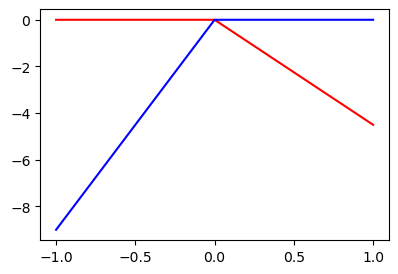

In [21]:
relu = torch.nn.ReLU()
plt.plot(x,-4.5*relu(x),color="red")
plt.plot(x,-9*relu(-x),color="blue")

- y절편이 4.5이므로

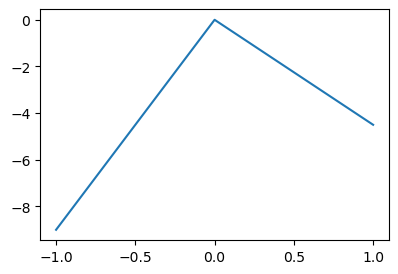

In [22]:
relu = torch.nn.ReLU()
# plt.plot(x,-4.5*relu(x),color="red")
# plt.plot(x,-9*relu(-x),color="blue")
y = -4.5*relu(x) + -9*relu(-x)
plt.plot(x,y)

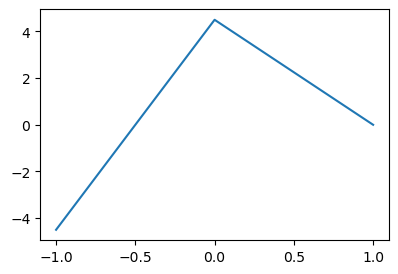

In [24]:
relu = torch.nn.ReLU()
# plt.plot(x,-4.5*relu(x),color="red")
# plt.plot(x,-9*relu(-x),color="blue")
y = -4.5*relu(x) + -9*relu(-x) + 4.5
plt.plot(x,y)

)🗣️

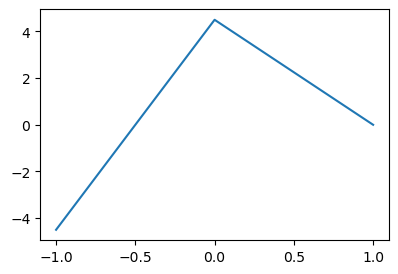

In [25]:
relu = torch.nn.ReLU()
#plt.plot(x,-4.5*relu(x),color="red")
#plt.plot(x,-9*relu(-x),color="blue")
y = -4.5*relu(x) + -9*relu(-x) + 4.5
plt.plot(x,y)

`-` 좀 더 중간과정을 시각화 -- (강의때 설명안했음) 

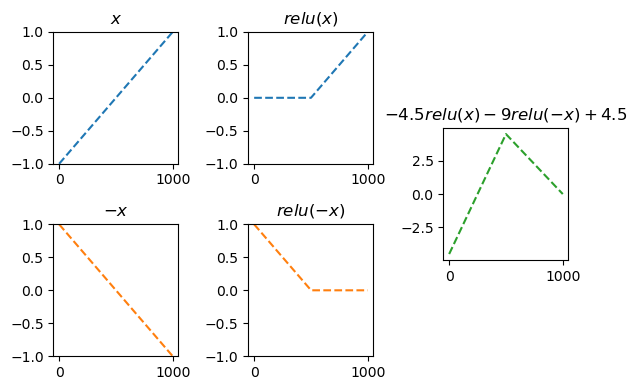

In [26]:
fig = plt.figure(figsize=(6, 4))
spec = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title(r'$x$'); ax1.set_ylim(-1,1)
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title(r'$-x$'); ax2.set_ylim(-1,1)
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title(r'$relu(x)$'); ax3.set_ylim(-1,1)
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title(r'$relu(-x)$'); ax4.set_ylim(-1,1)
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title(r'$-4.5 relu(x)-9 relu(-x)+4.5$')
#---#
ax1.plot(x,'--',color='C0')
ax2.plot(-x,'--',color='C1')
ax3.plot(relu(x),'--',color='C0')
ax4.plot(relu(-x),'--',color='C1')
ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
fig.tight_layout()

`#`

`# 방법3` -- `relu`의 브로드캐스팅 활용

🗣️(

In [27]:
torch.tensor([[1,2],[2,3],[4,-4]]) 

tensor([[ 1,  2],
        [ 2,  3],
        [ 4, -4]])

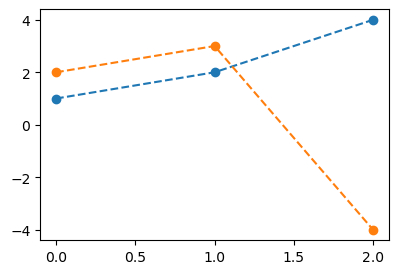

In [28]:
plt.plot(torch.tensor([[1,2],[2,3],[4,-4]]), '--o') 

- column별로 plot이 됨

In [31]:
torch.concat([x,-x], axis=1)

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]])

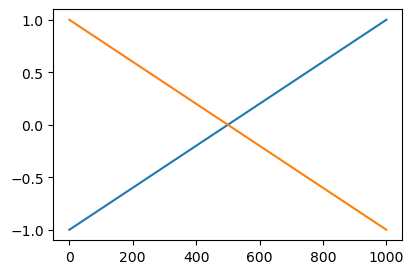

In [32]:
plt.plot(torch.concat([x,-x], axis=1))

- 여기서 relu를 하면? relu는 column wise하게 브로드캐스팅 됨

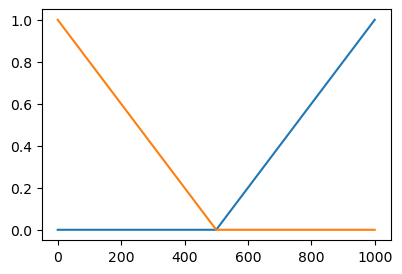

In [33]:
plt.plot(relu(torch.concat([x,-x], axis=1)))

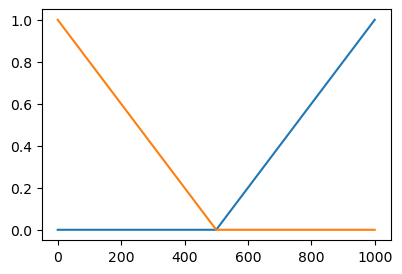

In [34]:
u = torch.concat([x,-x], axis=1)
v = relu(u)
plt.plot(v)

In [37]:
u = torch.concat([x,-x], axis=1)
v = relu(u)
v[:,[0]] # 첫번째 열

tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [0.9960],
        [0.9980],
        [1.0000]])

)🗣️

`-` 우리가 하고 싶은 것

In [38]:
# y = -4.5*relu(x) + -9*relu(-x) + 4.5

`-` 아래와 같은 아이디어로 y를 계산해도 된다. 

1. x, relu 준비
2. u = [x -x] 
3. v = relu(u) = [relu(x), relu(-x)] = [v1 v2]
4. y = -4.5\*v1 + -9\*v2 + 4.5

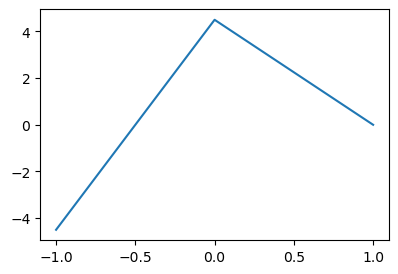

In [39]:
u = torch.concat([x,-x],axis=1)
v = relu(u)
v1 = v[:,[0]]
v2 = v[:,[1]]
y = -4.5*v1 -9*v2 + 4.5 
plt.plot(x,y)

🗣️(

> Bonus

In [41]:
v # nx2

tensor([[0.0000, 1.0000],
        [0.0000, 0.9980],
        [0.0000, 0.9960],
        ...,
        [0.9960, 0.0000],
        [0.9980, 0.0000],
        [1.0000, 0.0000]])

In [43]:
v.T # 2xn, 중첩 리스트로 해석 가능

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9960, 0.9980, 1.0000],
        [1.0000, 0.9980, 0.9960,  ..., 0.0000, 0.0000, 0.0000]])

In [44]:
v1, v2 = v.T # 언패킹, v1과 v2는 length n인 vector
y = -4.5*v1 -9*v2 + 4.5 
y # y 역시 vector

tensor([-4.5000, -4.4820, -4.4640,  ...,  0.0180,  0.0090,  0.0000])

- y가 nx1이 되어야하므로

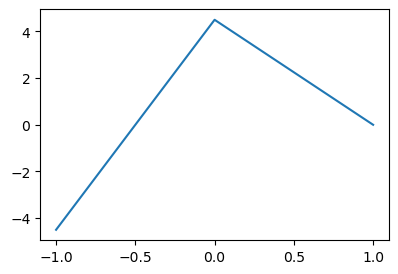

In [45]:
v1, v2 = v.T
y = -4.5*v1 -9*v2 + 4.5 
y = y.reshape(-1,1)
plt.plot(x,y)

)🗣️

`#`

`# 방법4` -- `y = linr(v)` 

🗣️(

In [46]:
v

tensor([[0.0000, 1.0000],
        [0.0000, 0.9980],
        [0.0000, 0.9960],
        ...,
        [0.9960, 0.0000],
        [0.9980, 0.0000],
        [1.0000, 0.0000]])

In [47]:
v @ torch.tensor([[-4.5],[-9]])

tensor([[-9.0000],
        [-8.9820],
        [-8.9640],
        ...,
        [-4.4820],
        [-4.4910],
        [-4.5000]])

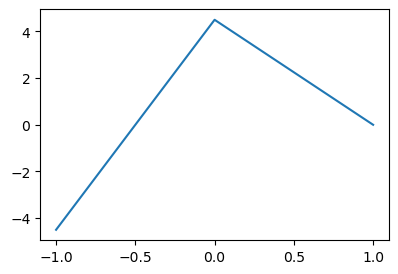

In [48]:
y = v @ torch.tensor([[-4.5],[-9]]) + 4.5
plt.plot(x,y)

)🗣️

In [49]:
# 4. y = -4.5*v1 + -9*v2 + 4.5 = [v1 v2] @ [[-4.5],[-9]] + 4.5 
# y = -4 + 3*x = [1 x] @ [[-4],[3]]

In [50]:
x 
u = torch.concat([x,-x],axis=1)
v = relu(u) 
y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

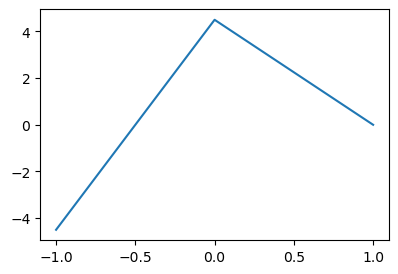

In [51]:
plt.plot(x,y)

`#`

`# 방법5` -- `u = linr(x)` 

🗣️(

In [52]:
#u = [x -x] = x @ [[1 -1]]

)🗣️

In [53]:
# x 
# u = torch.concat([x,-x],axis=1)
# v = relu(u) 
# y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

In [54]:
x 
u = x @ torch.tensor([[1.0, -1.0]])
v = relu(u) 
y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 

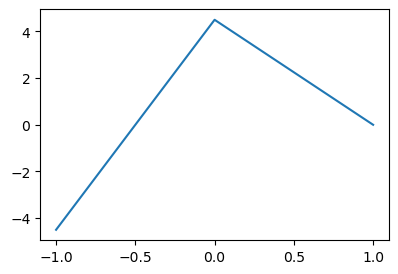

In [55]:
plt.plot(x,y)

`#`

`# 방법6` -- `torch.nn.Linear()`를 이용 

🗣️(

In [57]:
# x 
# u = x @ torch.tensor([[1.0, -1.0]]) = linr(x) => l1(x) 
# v = relu(u) = a1(u)
# y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 = linr(x) => l2(v) 

- l은 linear의 약자, a는 activation function의 약자

In [58]:
# u = l1(x) # l1은 x->u인 선형변환: (n,1) -> (n,2) 인 선형변환
l1 = torch.nn.Linear(1,2,bias=False)
l1.weight.data = torch.tensor([[1.0, -1.0]]).T 
l1(x)

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]], grad_fn=<MmBackward0>)

In [59]:
u

tensor([[-1.0000,  1.0000],
        [-0.9980,  0.9980],
        [-0.9960,  0.9960],
        ...,
        [ 0.9960, -0.9960],
        [ 0.9980, -0.9980],
        [ 1.0000, -1.0000]])

In [60]:
# u = l1(x) # l1은 x->u인 선형변환: (n,1) -> (n,2) 인 선형변환
l1 = torch.nn.Linear(1,2,bias=False)
l1.weight.data = torch.tensor([[1.0, -1.0]]).T 
a1 = relu 
l2 = torch.nn.Linear(2,1,bias=True) # + 4.5 => bias
l2.weight.data = torch.tensor([[-4.5],[-9]]).T 
l2.bias.data = torch.tensor([4.5])
u = l1(x)
v = a1(u) 
y = l2(v) 

In [61]:
y

tensor([[-4.5000],
        [-4.4820],
        [-4.4640],
        ...,
        [ 0.0180],
        [ 0.0090],
        [ 0.0000]], grad_fn=<AddmmBackward0>)

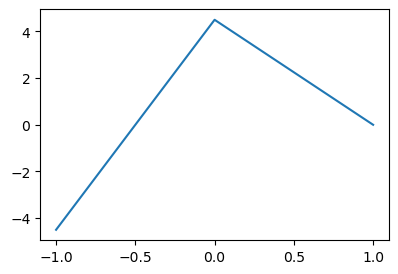

In [62]:
plt.plot(x,y.data)

- piecewise linear function 정의 (x -> l1 -> a1 -> l2) => 한 번에 그래프 그리기 가능

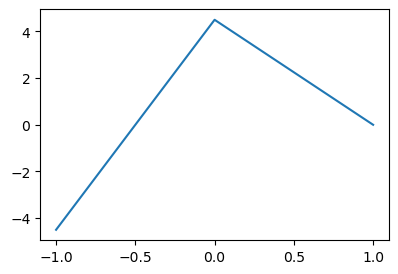

In [63]:
pwlinr = torch.nn.Sequential(l1,a1,l2)
plt.plot(x,pwlinr(x).data)

)🗣️

In [64]:
# x 
# u = x @ torch.tensor([[1.0, -1.0]]) = l1(x) 
# v = relu(u) = a1(u)
# y = v @ torch.tensor([[-4.5],[-9]]) + 4.5 = l2(v) 

In [65]:
# u = l1(x) # l1은 x->u인 선형변환: (n,1) -> (n,2) 인 선형변환
l1 = torch.nn.Linear(1,2,bias=False)
l1.weight.data = torch.tensor([[1.0, -1.0]]).T 
a1 = relu 
l2 = torch.nn.Linear(2,1,bias=True)
l2.weight.data = torch.tensor([[-4.5],[-9]]).T 
l2.bias.data = torch.tensor([4.5])
#---#
x
u = l1(x)
v = a1(u) 
y = l2(v) 

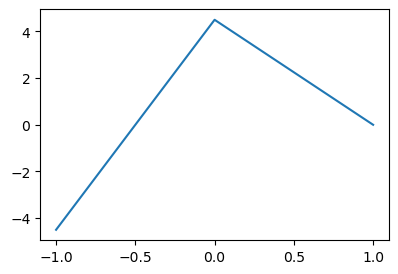

In [66]:
plt.plot(x,y.data)

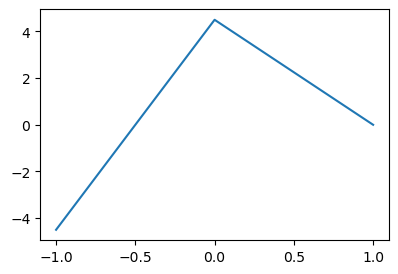

In [67]:
pwlinr = torch.nn.Sequential(l1,a1,l2)
plt.plot(x,pwlinr(x).data)

`#`

:::{.callout-note}

***수식표현***

`(1)` ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

`(2)`
$l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\ x_n & -x_n\end{bmatrix}$

-   ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
-   ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

`(3)`
$(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\ \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

`(4)`
$(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

-   ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
-   $b^{(2)}=4.5$

`(5)`
$\textup{pwlinr}({\bf X})=(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}$

$\quad =\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$

:::

# 4. 스펙의역설 적합 📝

`-` 다시한번 데이터 정리 

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2025/main/posts/ironyofspec.csv")

🗣️(

In [69]:
torch.tensor(df.x)

tensor([-1.0000, -0.9990, -0.9980,  ...,  0.9980,  0.9990,  1.0000],
       dtype=torch.float64)

- dtype=torch.float64을 보기 싫으면 다음과 같이 하면 됨 (pytorch는 기본적으로 32형으로 저장되는 것을 원함)

In [71]:
torch.tensor(df.x).float() # vector

tensor([-1.0000, -0.9990, -0.9980,  ...,  0.9980,  0.9990,  1.0000])

In [72]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

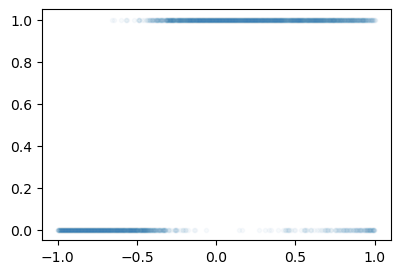

In [73]:
plt.plot(x,y,'.',alpha=0.03)

- prob: 참값, 관측 불가

)🗣️

In [74]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

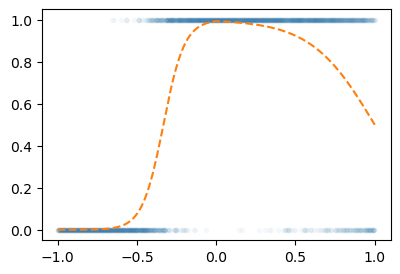

In [75]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')

`-` Step1에 대한 생각: 네트워크를 어떻게 만들까? = 아키텍처를 어떻게 만들까? = 모델링 



$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

- $l_1$: `torch.nn.Linear(1,2,bias=False)`
- $a_1$: `torch.nn.ReLU()`
- $l_2$: `torch.nn.Linear(2,1,bias=True)`
- $a_2$: `torch.nn.Sigmoid()`

🗣️ l2까지는 꺾인 선

`-` Step1-4

In [76]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(1,2,bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(2,1,bias=True),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss() 
optimizr = torch.optim.Adam(net.parameters())

🗣️ lr 따로 설정 안하면 default로 들어감

In [77]:
for epoc in range(5000):
    ## step1
    yhat = net(x)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

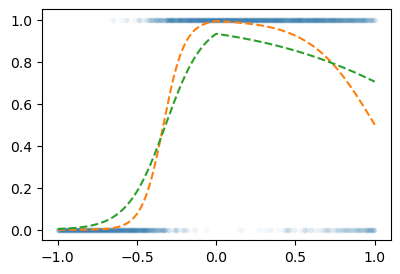

In [78]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')
plt.plot(x,yhat.data,'--')

한번더~

In [79]:
for epoc in range(5000):
    ## step1
    yhat = net(x)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

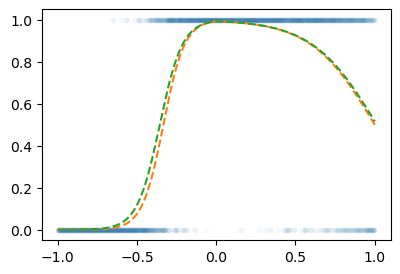

In [80]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x,prob,'--')
plt.plot(x,yhat.data,'--')

🗣️(

- ???

In [81]:
net

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=False)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [83]:
net[0](x) # 처음 linear transform 통과

tensor([[-2.8167,  3.9404],
        [-2.8139,  3.9364],
        [-2.8111,  3.9325],
        ...,
        [ 2.8111, -3.9325],
        [ 2.8139, -3.9364],
        [ 2.8167, -3.9404]], grad_fn=<MmBackward0>)

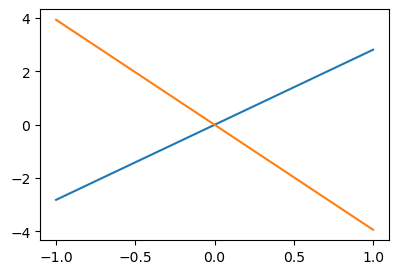

In [84]:
plt.plot(x,net[0](x).data)

- 기울기 튜닝이 이미 되어 있음 (생각대로라면 나중에 되어야 함)

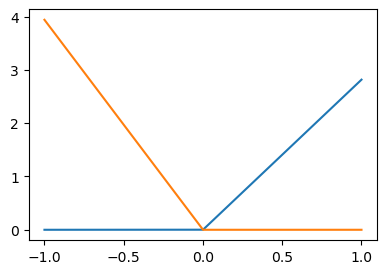

In [85]:
plt.plot(x,net[1](net[0](x)).data) # 랠루

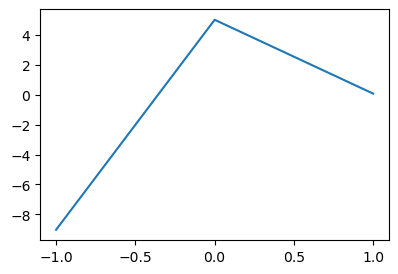

In [86]:
plt.plot(x,net[2](net[1](net[0](x))).data) # 2번째 linear transform

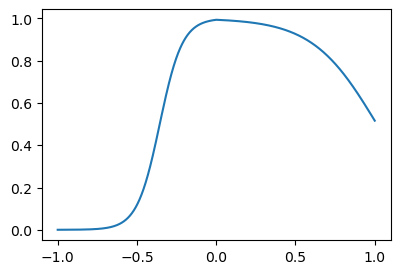

In [87]:
plt.plot(x,net[3](net[2](net[1](net[0](x)))).data) # sigmoid

- 원래라면 u = x @ [1 -1] 처럼 그래프 틀을 맞춰놓고 기울기를 미세조정하였지만
- 기울기를 처음부터 미세조정하면서 해도 잘 맞을 수 있음
    - 이 말은 global min을 하나만 갖는 것이 아님 (여러 개의 최저값이 있을 수 있음) 

)🗣️